<a href="https://colab.research.google.com/github/ofithcheallaigh/uu_pgc_ai/blob/main/Machine%20Learning/Week1/Completed%20Exercises/Exercise_1_1_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Simple Linear Regression

In this exercise you will implement a simple least square linear regression model $y = w_0 + w_1 x$.

You can calculate the optimal values for the weights by impenting the normal equations.

You will test your code outing the Olympic 100m dataset from _A Frist Course in Machine Learning_.


*   This file contains two columns of data: year, and winning time in the men's Olympic 100m finals
*   You may fin reading through Section 1.1.6 of _A First Course in Machine Learning_ useful first. This gives you an idea of the calculations you will be preforming

### Step 0
Setup Google Drive to obatin data. This is **not** a step in the required exercise.





In [27]:
# Imports and mount my Google Drive, which contains my data
from google.colab import drive
from google.colab import files
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
root_path = '/content/drive/My Drive/University of Ulster/PG Cert AI/Machine Learning/Week1/'
%cd '/content/drive/My Drive/University of Ulster/PG Cert AI/Machine Learning/Week1/'

/content/drive/My Drive/University of Ulster/PG Cert AI/Machine Learning/Week1


### Step 1
Use the `loadtxt` method from `numpy` to read the data-file `olympic100m.txt'

In [29]:
import numpy as np
my_data = np.loadtxt('olympic100m.txt',delimiter=',',skiprows=0)

In [30]:
# Confirm data is imported
print(my_data)

[[1896.     12.  ]
 [1900.     11.  ]
 [1904.     11.  ]
 [1906.     11.2 ]
 [1908.     10.8 ]
 [1912.     10.8 ]
 [1920.     10.8 ]
 [1924.     10.6 ]
 [1928.     10.8 ]
 [1932.     10.3 ]
 [1936.     10.3 ]
 [1948.     10.3 ]
 [1952.     10.4 ]
 [1956.     10.5 ]
 [1960.     10.2 ]
 [1964.     10.  ]
 [1968.      9.95]
 [1972.     10.14]
 [1976.     10.06]
 [1980.     10.25]
 [1984.      9.99]
 [1988.      9.92]
 [1992.      9.96]
 [1996.      9.84]
 [2000.      9.87]
 [2004.      9.85]
 [2008.      9.69]]


### Step 2

Store the years in a vector called `x`, and the winning times in a vector called `y` 

In [31]:
x = my_data[:,0]              # Gets the years data, and stores in 'x'
y = my_data[:,1]              # Gets the time data, and stores in 'y'

### Step 3

Calculate the optimal values of $w_0$ and $w_1$. These are given in Equations 1.8 and 1.10 in a *First Course in Machine Learning* (note we are using $y$ instead of $t$). You will need the `multiply` and `mean` methods from numpy.

Equation 1.8 is:

>$\widehat{w_0} = \bar{t} - w_1  \bar{x}$

Equation 1.10 is:

>$\widehat{w_1} = \frac{\overline{xt}-\bar{x}\bar{t}}{\overline{x^2}-(\bar{x})^2}$

So, we need to work out the various elements of these equations.   
Note: we use $y$ instead of $t$. 

In [35]:
# Equation elements:
xy = np.multiply(x,y)
xyBar = np.mean(xy)
xBar = np.mean(x)
xSquared = np.multiply(x,x)
xSquaredBar = np.mean(xSquared)
xBarSquared = np.multiply(xBar,xBar) 
yBar = np.mean(y)

# Equations:
w1 = (xyBar - (xBar * yBar))/(xSquaredBar - xBarSquared)
w0 = yBar - w1*xBar

print("The value for w\u2081 is: ", w1)
print("The value for w\u2080 is: ", w0)

The value for w₁ is:  -0.013330885710960602
The value for w₀ is:  36.41645590250286


### Step 4
Use `matplotlib` to plot the data, and use your weights from Step 3 to plot the best fit line through the data.

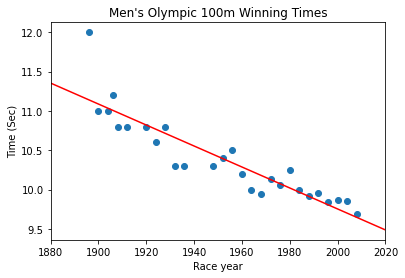

In [40]:
import matplotlib.pyplot as plt

plt.scatter(x,y)                      # Line of best fit requires a scatter plot

# Creating line of best fit
data_line = np.linspace(1880,2020,10)
lobf_equ = w1 * data_line + w0

# Setting up the plot
plt.plot(data_line, lobf_equ, 'r', label='best fit line')
plt.xlabel("Race year")
plt.xlim(1880,2020)                   # w/o this, lobf doesn't go to end of axis
plt.ylabel("Time (Sec)")
plt.title("Men's Olympic 100m Winning Times")
plt.show()